# Tarea 3

# Física Estadística

## Diego Barón, Universidad de Antioquia

## Resumen

En esta tarea se resuelve el modelo de Ising bidimensional, el método utlizado es calcular cada uno de los microestados y las energias asociadas a cada uno de estos para obtener la función partición. Encontramos una transición de fase del sistema, y se analizan los dominios magnéticos encontrados.

### Palabras clave: 
Modelo de Ising 2D

#### NOTA: Este notebook debe ser corrido desde el principio para que funcione debidamente.


## Introducción

El modelo de espines interactuanes le fue sugerido a Ising por su asesor doctoral W. Lenz en $1920$, y resuelto por E. Ising para el caso unidimensional, dóonde se encuentra que no existe transición de fase, esto físicamente significa que, e.g. para el caso de interación magnética, no se observa una magnetización espontánea del sistema. En $1948$ L. Onsager logra dar una solución analítica para el caso bidimiensional, dónde una transición de fase es encontrada. Recientemente se ha hipotetizado que para el caso tridimensional, el modelo de Ising es un problema tipo $NP$-completo, A. Poliakov en $1978$ mostró la equivalencia del modelo con un sistema de cuerdas fermiónicas supersimetricas no interactuantes.

Este modelo tiene como condición {\it sine qua non}, que el sistema físico puede ser representado por un retículo regular de moléculas en el espacio. Se describen tres tipos de sistemas: $i)$ Imanes, $ii)$ mezclas de dos tipos de sustancias y $iii)$ mezclas de moléculas y 'huecos', cuyas excitaciones se denominan quasi-partículas. A cada punto en la malla se le asigna una variable $\sigma_i$ que puede tomar dos valores ($\pm 1$).


La energía de interacción depende de $J(r_{ij})$, la integral de intercambio, el cual es un párametro que determina la intensidad del acople, considerando únicamente los vecinos más cercanos. Si se favorecen las configuraciones paralelas ($J>0$) se encuentra que el sistema evoluciona dando lugar a: $i)$ Magnetización espontánea, $ii)$ separación de fase y $iii)$ condensación de moléculas. Si, contrariamente, se favorecen las configuraciones antiparalelas ($J<0$) se encuentra  $i)$ orden antiferromagnético, $ii)$ super-retículos en mezclas y $iii)$ ordenamiento de moléculas tipo fase sólida.


Centrando nuestra atención en el caso $i)$ se encuentran dos tipos de orden magnético (de la vasta familia de estructuras encontradas en la naturaleza, {\it ferromagnetismo}: momentos magnéticos atómicos de igual magnitud alineados en la misma dirección, producto de la interación entre ellos. Los elementos químicos ferromagnéticos son: Fe, Ni, Cu, Gd,Dy,Tb,Ho,Er,Tm, y permiten la construcción de motores eléctricos, generadores, transformadores, discos duros, entre otros. {\it Paramagnetismo}: sistemas que tiene imanación nula para campo magnético externo nulo.



## Resultados y discusión

### Método de conteo exacto (enumeración exacta)

En esta primera parte se definen las funciones necesarias para calcular los microestados y la densidades de estado. Es importante tener en cuenta que se hizo el cálculo de las energías utilizando condiciones de frontera perioódicas.

In [2]:
import numpy as np  # IMPORTAR LAS LIBRERIAS NECESARIAS
from time import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [37]:
# ESTA RUTINA FUE TOMADA DE UNA FUENTE EXTERNA EN STACKOVERFLOW

def next_permutation(seq, pred=cmp): # RUTINA PARA GENERAR LAS PERMUTACIONES CON REPETICION 
    """Like C++ std::next_permutation() but implemented as
    generator. Yields copies of seq."""
    def reverse(seq, start, end):
        # seq = seq[:start] + reversed(seq[start:end]) + \
        #       seq[end:]
        end -= 1
        if end <= start:
            return
        while True:
            seq[start], seq[end] = seq[end], seq[start]
            if start == end or start+1 == end:
                return
            start += 1
            end -= 1
    if not seq:
        raise StopIteration
    try:
        seq[0]
    except TypeError:
        raise TypeError("seq must allow random access.")
    first = 0
    last = len(seq)
    seq = seq[:]
    # Yield input sequence as the STL version is often
    # used inside do {} while.
    yield seq[:]
    if last == 1:
        raise StopIteration
    while True:
        next = last - 1
        while True:
            # Step 1.
            next1 = next
            next -= 1
            if pred(seq[next], seq[next1]) < 0:
                # Step 2.
                mid = last - 1
                while not (pred(seq[next], seq[mid]) < 0):
                    mid -= 1
                seq[next], seq[mid] = seq[mid], seq[next]
                # Step 3.
                reverse(seq, next1, last)
                # Change to yield references to get rid of
                # (at worst) |seq|! copy operations.
                yield seq[:]
                break
            if next == first:
                raise StopIteration
    raise StopIteration

In [38]:
# GENERADOR DE MICROESTADOS RED N=L*L


def Energias(L): # ESTA FUNCION SOLO DEPENDE DEL TAMANO DEL LADO DE LA RED
    Energias=[]
    N=L*L #NUMERO DE SPINES EN RED
    for i in range(0,N+1): # CREA LAS PERMUTACIONES CON REPETICION DE ESTADOS ARRIBA Y ABAJO
        print str(i)+" Espines abajo"
        microestados=list(next_permutation([-1]*i+[1]*(N-i)))
        c=0
        for i in microestados:
            microestados[c]=np.reshape(i,(L,L)) # GENERA LOS ARREGLOS EN FORMA DE MATRICES CUADRADAS
            c+=1
        for micro in microestados: # ESTA RUTINA CALCULA LA ENERGIA DE CADA MICROESTADO
            Energia=0
            for i in range(L): # SE RECORREN LOS ARREGLOS
                for j in range(L):
                    arriba=i-1
                    abajo=i+1
                    der=j+1
                    izq=j-1
                    if arriba<0: # CON ESTAS CONDICIONES SE IMPLEMENTAN LAS CONDICIONES DE FRONTERA PERIODICAS
                        arriba=-1
                    if abajo>L-1:
                        abajo=0
                    if der>L-1:
                        der=0
                    if izq<0:
                        izq=-1
                    Energia=Energia-micro[i][j]*micro[arriba][j]-micro[i][j]*micro[abajo][j]-micro[i][j]*micro[i][der]-micro[i][j]*micro[i][izq]
            Energia=Energia/2 # LA FUNCION ANTERIOR CUENTA DOS VECES CADA INTERACCION
            Energias.append(Energia)
    return Energias # ESTA FUNCION DEVUELVE UN VECTOR CON LAS ENERGIAS CORRESPONDIENTES A CADA MICROESTADO

# ESTA FUNCION CALCULA LA DENSIDAD DE ESTADOS
                        
def DensidadEstado(Energias):
    EnergiasSR=[]
    Omega=[]
    for i in Energias: # CUENTA EL NUMERO DE DIFERENTES ENERGIAS
        if i not in EnergiasSR:
            EnergiasSR.append(i)
    for j in EnergiasSR: # CUENTA EL NUMERO DE VECES QUE SE REPITE CADA ENERGIA PARA CALCULAR OMEGA
        c=0
        for k in Energias:
            if k==j:
                c+=1
        Omega.append(c)
    Densidad=[]
    for m in range(len(EnergiasSR)):
        Densidad.append([EnergiasSR[m],Omega[m]])
    return Densidad # DEVUELVE UNA FUNCION CON EL PRIMER VALOR SIENDO LA ENERGIA Y EL SEGUNDO 
# EL NUNERO DE MICROESTADOS QUE POSEEN ESE VALOR 


In [39]:
# MALLA 2*2

t0=time()
E22=Energias(2)
Resultado22=DensidadEstado(E22)
t1=time()

#ESCRIBE LOS  RESULTADOS DEL TIEMPO DE COMPUTO Y DENSIDAD DE ESTADOS EN UN VECTOR
f = open('Energias22.txt','w')
f.write(str(Resultado22))
f.write("\n"+str(t1-t0))
f.close()

0 Espines abajo
1 Espines abajo
2 Espines abajo
3 Espines abajo
4 Espines abajo


In [40]:
# MALLA 3*3

t0=time()
E33=Energias(3)
Resultado33=DensidadEstado(E33)
t1=time()

f = open('Energias33.txt','w')
f.write(str(Resultado33))
f.write("\n"+str(t1-t0))
f.close()


0 Espines abajo
1 Espines abajo
2 Espines abajo
3 Espines abajo
4 Espines abajo
5 Espines abajo
6 Espines abajo
7 Espines abajo
8 Espines abajo
9 Espines abajo


In [41]:
# MALLA 4*4

t0=time()
E44=Energias(4)
Resultado44=DensidadEstado(E44)
t1=time()

f = open('Energias44.txt','w')
f.write(str(Resultado44))
f.write("\n"+str(t1-t0))
f.close()

0 Espines abajo
1 Espines abajo
2 Espines abajo
3 Espines abajo
4 Espines abajo
5 Espines abajo
6 Espines abajo
7 Espines abajo
8 Espines abajo
9 Espines abajo
10 Espines abajo
11 Espines abajo
12 Espines abajo
13 Espines abajo
14 Espines abajo
15 Espines abajo
16 Espines abajo


In [42]:
# MALLA 5*5
'''
t0=time()
E55=Energias(5)
Resultado55=DensidadEstado(E55)
t1=time()

f = open('Energias55.txt','w')
f.write(str(Resultado55))
f.write("\n"+str(t1-t0))
f.close()
'''
Resultado55=[[-50, 2], [-42, 50], [-38, 100], [-34, 850], [-30, 3140], [-26, 16300], [-22, 74500], [-18, 311800], [-14, 1014900], [-10, 2696080], [-6, 5230300], [-2, 7431800], [2, 7413900], [6, 5276500], [10, 2645740], [14, 1024150], [18, 314300], [22, 82750], [26, 14800], [30, 2470]]

### Densidad de estados (DOS)
Vamos a graficar la densidad de estados para cada caso.

<Container object of 3 artists>

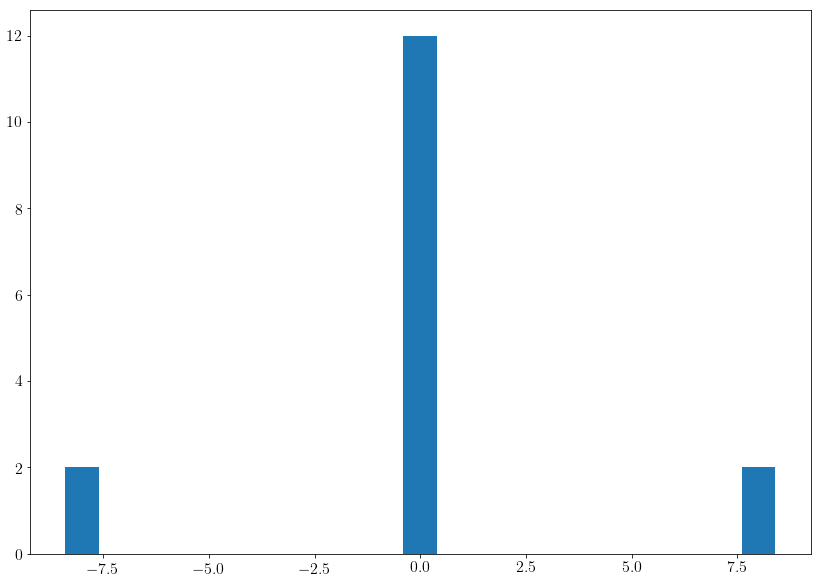

In [43]:
def DOS(Resultado):
    x=[]
    y=[]
    for i in Resultado:
        x.append(i[0])
        y.append(i[1])
    return [x,y]

# 2X2
DOS22=DOS(Resultado22)
plt.bar(DOS22[0], height=DOS22[1])


<Container object of 6 artists>

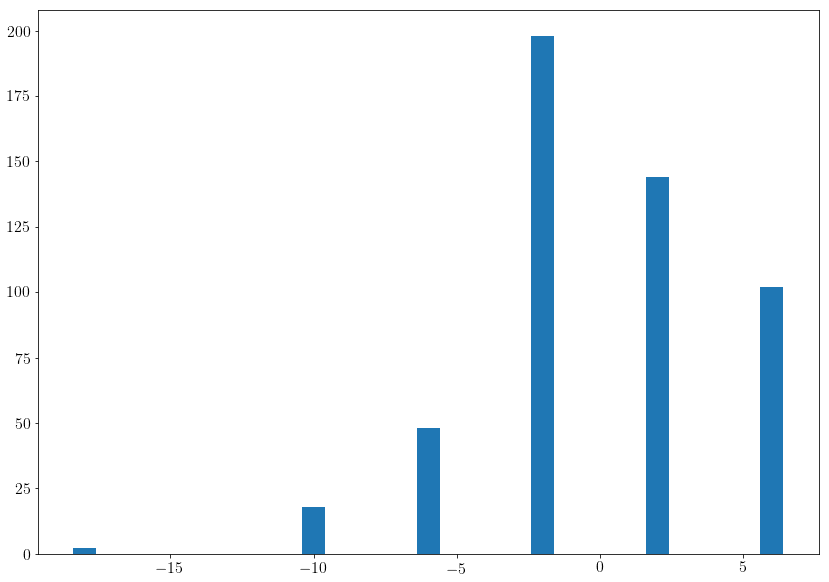

In [44]:
# 3X3
DOS33=DOS(Resultado33)
plt.bar(DOS33[0], height=DOS33[1])


<Container object of 15 artists>

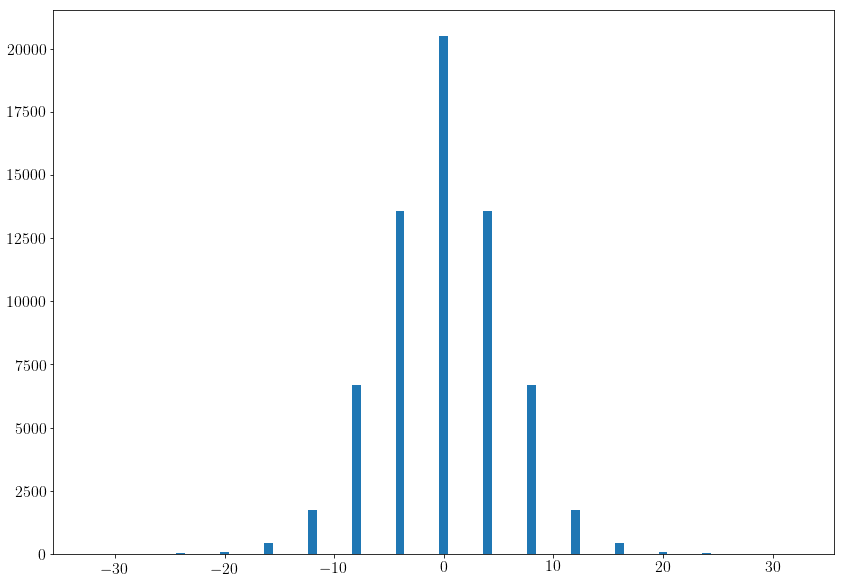

In [45]:
# 4X4
DOS44=DOS(Resultado44)
plt.bar(DOS44[0], height=DOS44[1])

<Container object of 20 artists>

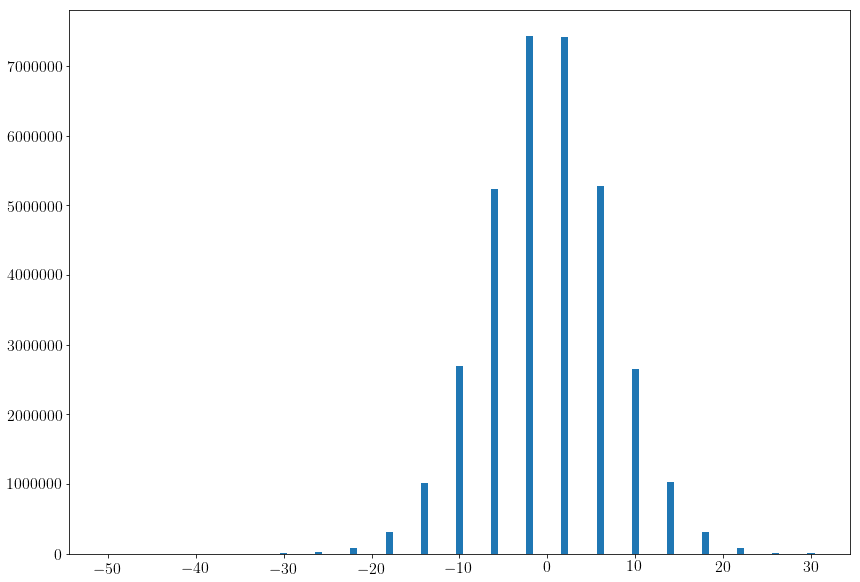

In [46]:
# 5X5
DOS55=DOS(Resultado55)
plt.bar(DOS55[0], height=DOS55[1])

Ya que en este punto tenemos las densidades de estado, ahora nos disponemos a calcular la función de partición mediante:

$$Z(\beta)=\sum_E \Omega(E)\exp(-\beta E)$$

Además vamos a calcular el calor específico por partícula, esto lo haremos utilizando la siguiente expresión teórica (la cual demostramos aquí mismo):

$C_v=\frac{\beta^2}{N}(\langle E^2\rangle-\langle E\rangle^2) $  (1)

Demostración de (1):

Por el método de enumeración exacta, el calor específico por partícula se obtiene usando el postulado de compatibilidad con la termodinámica $U=\langle E\rangle$, y expresando en términos de la varianza de la energía
$$
C_v=\frac{\partial U}{\partial T}=\frac{\partial \langle E\rangle}{\partial T}=\frac{\partial \langle E\rangle}{\partial \beta}\frac{\partial \beta}{\partial T}
$$
$$
c_v=-\frac{\beta^2}{N}\frac{\partial \langle E\rangle}{\partial \beta}=-\frac{\beta^2}{N}\frac{\partial}{\partial \beta}\left(\frac{\sum_{\sigma}E_{\sigma}e^{-\beta E_{\sigma}}}{\sum_{\sigma}e^{-\beta E_{\sigma}}} \right)
$$
$$
=\frac{\beta^2}{N} \frac{\sum_{\sigma}E^2_{\sigma}e^{-\beta E_{\sigma}}\sum_{\sigma}e^{-\beta E_{\sigma}}-(\sum_{\sigma}E_{\sigma}e^{-\beta E_{\sigma}})^2}{(\sum_{\sigma}e^{-\beta E_{\sigma}})^2}
$$
$$
c^{En}_{v}(T,0)=-\frac{\beta^2}{N}\sigma_E
$$


In [47]:

def Zeta(T,Densidad): #CALCULA LA FUNCION DE PARTICION

    zet=0
    for j in Densidad:
        zet+=j[1]*np.exp(-1.0*j[0]/T)
    return zet

def prome_ene(T,Densidad): #CALCULA EL PROMEDIO DE LA ENERGIA
    e=0
    for j in Densidad:
        e+=j[0]*j[1]*np.exp(-1.0*j[0]/T)
    return e/Zeta(T,Densidad)
def prome_ene2(T,Densidad): #CALCULA EL CUADRADO DEL PROMEDIO DE LA ENERGIA 
    e2=0
    for j in Densidad:
        e2+=j[0]*j[0]*j[1]*np.exp(-1.0*j[0]/T)
    return e2/Zeta(T,Densidad)

In [62]:
#CALOR ESPECIFICO PARA EL SISTEMA 2*2
T=np.linspace(0.1,5,200)
e22=np.array([prome_ene2(i,Resultado22) for i in T ])
e2=np.array([prome_ene(i,Resultado22) for i in T ])
cv2=(e22-e2*e2)/T/T/4
#3*3
T=np.linspace(0.1,5,200)
e23=np.array([prome_ene2(i,Resultado33) for i in T ])
e3=np.array([prome_ene(i,Resultado33) for i in T ])
cv3=(e23-e3*e3)/T/T/9
#4*4
T=np.linspace(0.1,5,200)
e24=np.array([prome_ene2(i,Resultado44) for i in T ])
e4=np.array([prome_ene(i,Resultado44) for i in T ])
cv4=(e24-e4*e4)/T/T/16
#5*5
T=np.linspace(0.1,5,200)
e25=np.array([prome_ene2(i,Resultado55) for i in T ])
e5=np.array([prome_ene(i,Resultado55) for i in T ])
cv5=(e25-e5*e5)/T/T/25

import scipy.special as ss

T=np.linspace(0.1,5,200)
k=np.sinh(2/T)*2/np.cosh(2/T)**2
kprime=2*np.tanh(2/T)**2 - 1
Kuno=ss.ellipk(k)          #Complete elliptic integral of the first kind
Euno=ss.ellipe(k)          #Complete elliptic integral of the second kind.

Exacto=(2/np.pi)*(1/(T*np.tanh(2/T)))**2*(2*Kuno-2*Euno-(1-kprime)*(np.pi/2+kprime*Kuno))



[]

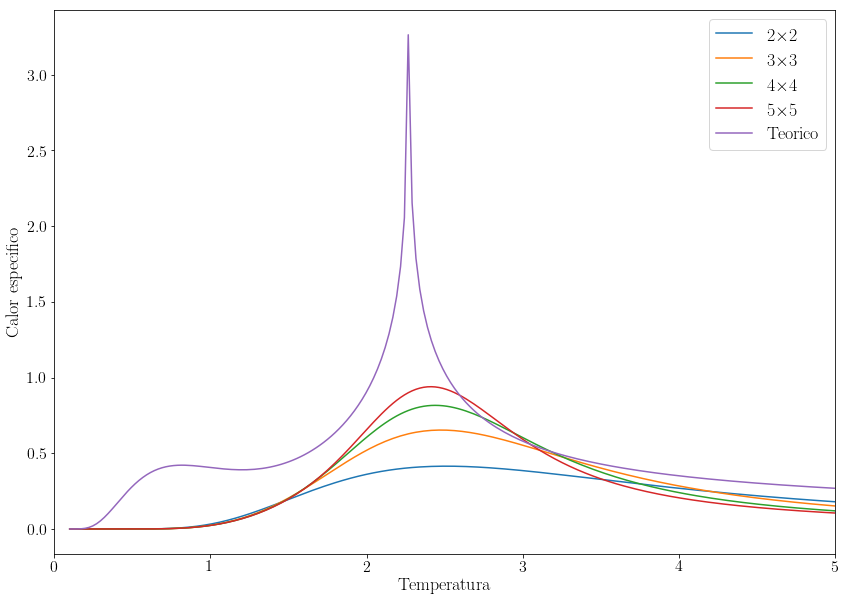

In [64]:
# CURVAS DE CALOR ESPECIFICO VERSUS TEMPERATURA



plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
plt.xlabel("Temperatura",fontsize=18)
plt.ylabel("Calor especifico",fontsize=18)
plt.plot(T,cv2,label=r'2\times2')
plt.plot(T,cv3,label=r'3\times3')
plt.plot(T,cv4,label=r'4\times4')
plt.plot(T,cv5,label=r'5\times5')
plt.plot(T,Exacto,label=r"Teorico")
xlim(0,5)
plt.legend(fontsize=18)
plt.plot()

En esta gráfica se muestra la curva de calor específico por partícula para diferentes tamaños de sistema y además hemos agregado el resultado analítico. Podemos ver como el pico va corriendose hacia la izquierda a medida que aumenta la dimensionalidad del sistema. Otro hecho muy importante es ver que desde el sistema 2X2 se puede observar una transición de fase, que se hace más marcada a medida que aumentamos la dimensionalidad.

Esta transición significa que para una temperatura menor a la temperatura de curie (aquella que se define en el máximo de la curva de calor específico) el sistema está en un estado ferromagnético. Luego de esta temperatura el sistema cambia de fase a un estado paramagnético. Es interesante observar entonces que aún cuando no hay un campo magnético externo, cualquier material por debajo de la temperatura de curie es ferromagnético. Esto explica como algunos materiales como el hierro tienen naturalmente este comportamiento.

Adicionalmente agregamos la curva de la temperatura de Curie versus el tamaño de sistema donde se puede observar que esta va disminuyendo, cabe resaltar que el valor teórico es $Tc=2.269185$.

Adicionalmente en la última gráfica podemos ver la magnetización del sistema versus la temperatura y vemos como despues de la temperatura crítica el sistema tiene una magnetización 0.

In [75]:
# OBTIENE LA TEMPERATURA DE CURIE
TC=[]
#2*2
indice=cv2.argmax(axis=0)
tc=T[indice]
TC.append(tc)
#3*3
indice=cv3.argmax(axis=0)
tc=T[indice]
TC.append(tc)
#4*4
indice=cv4.argmax(axis=0)
tc=T[indice]
TC.append(tc)
#5*5
indice=cv5.argmax(axis=0)
tc=T[indice]
TC.append(tc)
TC=np.array(TC)
print TC

[ 2.51306533  2.48844221  2.43919598  2.41457286]


### Temperatura de Curie vs Tamaño del sistema

Vamos a graficar la temperatura de Curie $T_C$ y el inverso del tamaño del sistema $\frac{1}{L}$. Luego aplicamos un método de interpolación lineal para obtener el valor teórico de $T_C(\infty)$. En nuestro caso obtenemos un intercepto de $b=2.359755$ lo que nos da un error de aproximación del 3.5% respecto al valor teórico, un resultado bastante bueno si se tiene en cuenta que solo tenemos 4 puntos de simulación. 

(0.32435268713042825, 2.3597559416897069)


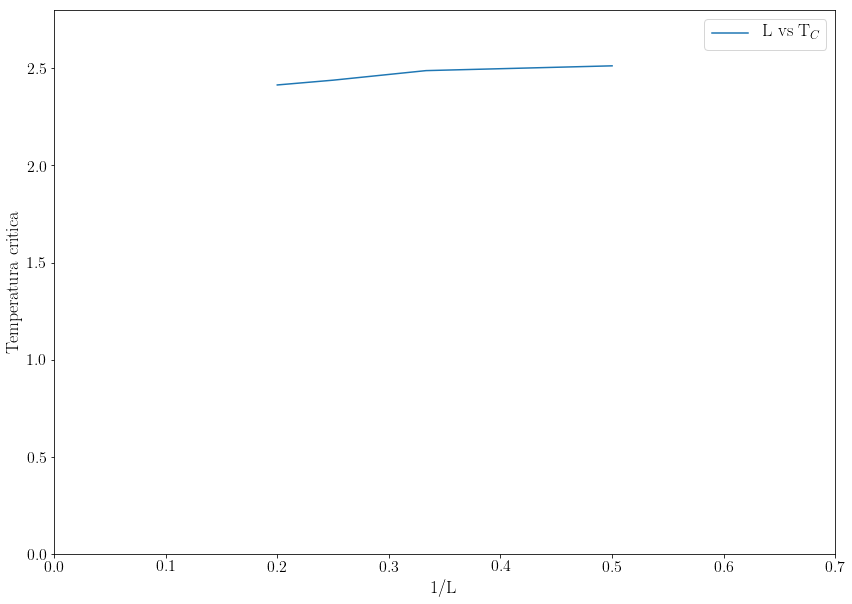

In [103]:
# GRAFICA TEMPERATURA DE CURIE VS INVERSO DEL TAMAÑO DEL SISTEMA
L=np.array([5.0,4.0,3.0,2.0])
Lm=1/L
matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
plt.xlabel("1/L",fontsize=18)
plt.ylabel("Temperatura critica",fontsize=18)
plt.plot(Lm,TC[::-1],label=r"L vs T_C")
xlim(0,0.7)
ylim(0,2.8)
plt.legend(fontsize=18)

# INTERPOLEMOS  PARA ENCONTRAR EL INTERCEPTO
Y=TC[::-1]
#Calores máximos
X=Lm
#Regresión de Fisher
m, b = np.polyfit(X,Y,1)         
print(m,b)


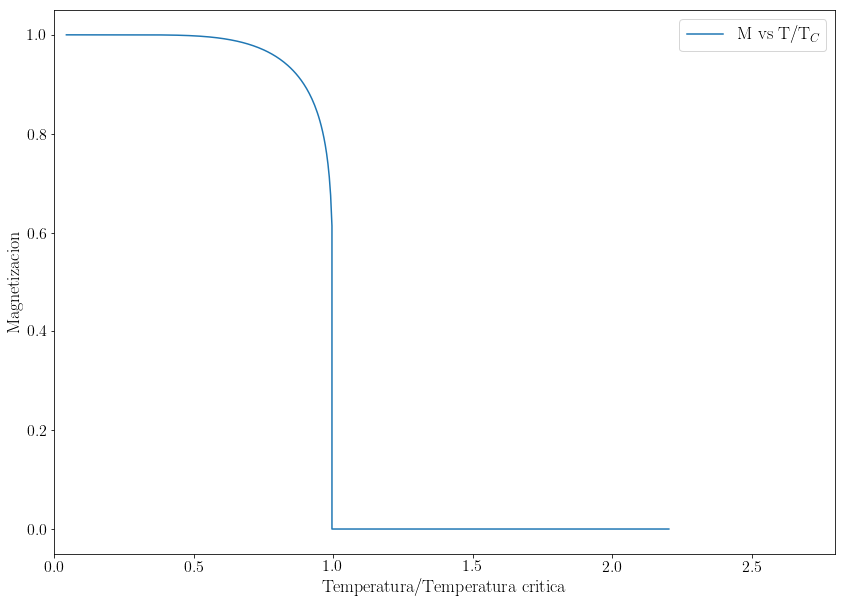

In [21]:
#GRAFICANDO MAGNETIZACIÓN.  Ver Yang (1952)

Tp=np.linspace(0.1,2.26,200)
Tcu=2.269185
magn=np.array([1.0]*200)

magn= magn-(np.sinh(2.0/Tp))**(-4)
magn = np.array(magn)**(1/8.0)

Tp=np.hstack((Tp,np.linspace(2.26,5,200)))
magn=np.hstack((magn,[00.0]*200))
matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
plt.xlabel("Temperatura/Temperatura critica",fontsize=18)
plt.ylabel("Magnetizacion",fontsize=18)
plt.plot(Tp/Tcu,magn,label=r'M vs T/T_C')
xlim(0,2.8)
plt.legend(fontsize=18)


## Estimación de tiempo computacional y memoria necesaria

En nuestros programas ademas de guardar la densidad de estados hemos calculado el tiempo de cómputo necesario para cada tamaño de sistema. Con estos valores hemos ajustado una línea de tendencia exponencial para calcular cuánto llevaria ejecutar el cálculo para un sistema 6X6 y 8X8. En el primer caso segun nuestra estimación son aproximadamente 2.7 días mientras que en el caso 8X8 serían 80 años. Esto demuestra que el cálculo de la temperatura de curie por el método del conteo de microestados completo es muy ineficiente y poco práctico.

Además queremos hacer un comentario acerca de la cantidad de memoria necesaria para manejar el problema. Si usaramos C++ que es un poco mas eficiente en el manejo de memoria para el caso 6X6 necesitariamos calcular $2^{36}$ configuraciones y cada una de ellas esta compuesta de un vector de 36 enteros. C++ utiliza 32 de memoria por entero por tanto la cantidad de memoria RAM necesaria para resolver el problema es:

$2^{36}*36*32 bits=9216 GB=9 Tb $ RAM

Una cantidad muy poco practica.

<img src="imagen1.png",width=700,height=710>

In [22]:
# CODIGO PARA ACCEDER A DATOS DE LOS ARCHIVOS QUE GUARDA CADA SISTEMA
archivo=open("Energias22.txt","r")
datos=archivo.readlines()
densidad=datos[1]

### Metodo de Monte-Carlo
En esta sección utilizaremos los métodos de Monte Carlo para hacer los mismos analísis, empecemos comparando la energía promedio utilizando los dos métodos:


In [23]:
import numpy as np # IMPORTA LAS LIBRERIAS NUMPY Y RANDOM PARA GENERAR NUMEROS ALEATORIOS
import random
def energy(S,N,nbr): # ESTA RUTINA CALCULA LAS ENERGIAS DE UN MICROESTADO EN PARTICULAR
    E=0.0
    for k in range(N):
        E-=S[k]*sum(S[nn] for nn in nbr[k])
    return 0.5*E


def e_prom_mc(Temp,numsteps,L):
    N=L*L
    nbr={i:((i//L)*L+(i+1)%L,(i+L)%N,(i//L)*L+(i-1)%L,(i-L)%N) for i in range(N)} # MEDIANTE UN DICCIONARIO SE DEFINEN LA
    # CONDICIONES DE FRONTERA PERIODICAS
    T=Temp
    S=[random.choice([1,-1]) for k in range(N)] # DEFINE UN MICROESTADO INICIAL ALEATORIO
    nsteps=N*numsteps # SE DEFINEN EL NUMERO DE VECES QUE SE VAN A CAMBIAR LOS ESPINES ALEATORIAMENTE
    beta=1/T # DEFINICION DE BETA 
    Energy=energy(S,N,nbr)
    E=[]
    for step in xrange(nsteps):
        k=random.randint(0,N-1)
        delta_E=2.0*S[k]*sum(S[nn] for nn in nbr[k])
        if random.uniform(0.0,1.0)<np.exp(-beta*delta_E): # SE ACEPTA UNA CONFIGURACION CON PROBABILIDAD METROPOLIS
            S[k]*=-1 # CAMBIA EL ESPIN
            Energy+=delta_E
        E.append(Energy)
    return sum(E)/float(len(E)*N) # CALCULA LA ENERGIA PROMEDIO POR PARTICULA

# 100*N PASOS
print e_prom_mc(2.0,100,5)
# 1000*N PASOS
print e_prom_mc(2.0,1000,5)
# 10000*N PASOS
print e_prom_mc(2.0,10000,5)
# 100000*N PASOS
print e_prom_mc(2.0,100000,5)
# 1000000*N PASOS
print e_prom_mc(2.0,1000000,5)


-1.775552
-1.7248384
-1.737728
-1.749786432
-1.7508194688


In [24]:
# PROMEDIO TEORICO
print prome_ene(2.0,Resultado55)/25

-1.74986470711


Podemos observar que a medida que el número de pasos de Monte-Carlo aumenta, el valor de la predicción se acerca a el resultado utlizando el método de numeración exacta.

Starting from file data_local_128_4.0.txt


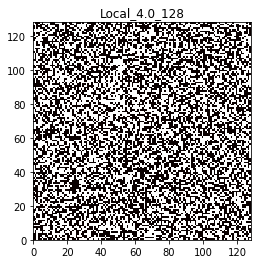

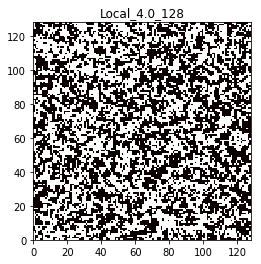

In [3]:
# RED 128X128 T=3.0 K Y nsteps=1000*N

import os
import random # SE IMPORTAN LAS LIBRERIAS A UTILIZAR
L=128         # DEFINICION DE PARAMETROS DE LA RED
N=L*L
T=4.0
nsteps=4000*N # NUMERO DE ITERACIONES

filename="data_local_"+str(L)+"_"+str(T)+".txt" # SE LE PONE UN NOMBRE AL ARCHIVO QUE GUARDA LA CONFIG INICIAL
if os.path.isfile(filename): # RUTINA QUE HACE QUE SE EMPIECE DE UNA CONFIG PREVIAMENTE GUARDADA O UNA NUEVA
    f=open(filename,"r")
    S=[]
    for line in f:
        S.append(int(line))
    f.close()
    print "Starting from file",filename
else:
    S=[random.choice([-1,1]) for k in range(N)]
    print "Starting from a random configuration"
f=open(filename,"w")
for a in S: # MAPEA LA MATRIZ CREADA AL ARCHIVO DE GUARDADO
    f.write(str(a)+'\n')
f.close()

def x_y(k,L): # GENERA LOS ELEMENTOS DE MATRIZ
    y=k//L
    x=k-y*L
    return x,y

conf=[[0 for x in range(L)] for y in range(L)] # MAPEA LOS ELEMENTOS DE S A UNA MATRIZ LLAMADA conf
for k in range(N):
    x,y=x_y(k,L)
    conf[x][y]=S[k]

pylab.imshow(conf, extent=[0,L,0,L],interpolation='nearest') # REALIZA LA GRAFICA DE LA CONDICION INICIAL
pylab.set_cmap('hot')
pylab.title(r'Local_'+str(T)+'_'+str(L))
pylab.savefig('plotA2_local_'+str(T)+'_'+str(L)+'.png')
pylab.show()


def energy(S,N,nbr): # ESTA RUTINA CALCULA LAS ENERGIAS DE UN MICROESTADO EN PARTICULAR
    E=0.0
    for k in range(N):
        E-=S[k]*sum(S[nn] for nn in nbr[k])
    return 0.5*E
E=[]
beta=1/T
nbr={i:((i//L)*L+(i+1)%L,(i+L)%N,(i//L)*L+(i-1)%L,(i-L)%N) for i in range(N)} # DICCIONARIO CON LAS CONDICIONES DE FRONTERA

Energy=energy(S,N,nbr) # SE CALCULA LA ENERGIA DE LA CONFIGURACION INICIAL

for step in xrange(nsteps): # ESTA RUTINA GENERA LA DINAMICA DEL SISTEMA
        k=random.randint(0,N-1)
        delta_E=2.0*S[k]*sum(S[nn] for nn in nbr[k])
        if random.uniform(0.0,1.0)<np.exp(-beta*delta_E): # SE ACEPTA UNA CONFIGURACION CON PROBABILIDAD METROPOLIS
            S[k]*=-1 # CAMBIA EL ESPIN
            Energy+=delta_E
        E.append(Energy) # AGREGA EL NUEVO VALOR DE LA ENERGIA

for k in range(N): # MAPEA LA CONFIGURACION FINAL A conf PARA SER GRAFICADA
    x,y=x_y(k,L)
    conf[x][y]=S[k]
    
pylab.imshow(conf, extent=[0,L,0,L],interpolation='nearest') # GRAFICA LA CONFIGURACION FINAL
pylab.set_cmap('hot')
pylab.title(r'Local_'+str(T)+'_'+str(L))
pylab.savefig('plotA2_local_'+str(T)+'_'+str(L)+'.png')
pylab.show()

Starting from file data_local_64_2.269185.txt


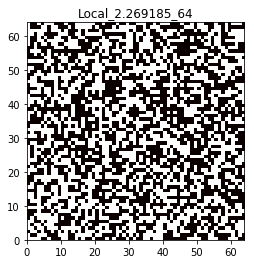

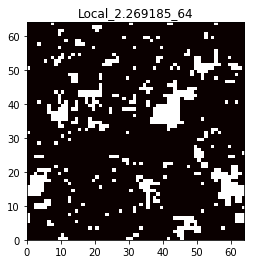

In [6]:
# RED 64X64 T=Tc  Y nsteps=4000*N

import os
import random
L=64
N=L*L
T=2.269185
nsteps=4000*N
E=[]

filename="data_local_"+str(L)+"_"+str(T)+".txt"
if os.path.isfile(filename):
    f=open(filename,"r")
    S=[]
    for line in f:
        S.append(int(line))
    f.close()
    print "Starting from file",filename
else:
    S=[random.choice([-1,1]) for k in range(N)]
    print "Starting from a random configuration"
f=open(filename,"w")
for a in S:
    f.write(str(a)+'\n')
f.close()

def x_y(k,L):
    y=k//L
    x=k-y*L
    return x,y

conf=[[0 for x in range(L)] for y in range(L)]
for k in range(N):
    x,y=x_y(k,L)
    conf[x][y]=S[k]

pylab.imshow(conf, extent=[0,L,0,L],interpolation='nearest')
pylab.set_cmap('hot')
pylab.title(r'Local_'+str(T)+'_'+str(L))
pylab.savefig('plotA2_local_'+str(T)+'_'+str(L)+'.png')
pylab.show()


def energy(S,N,nbr): # ESTA RUTINA CALCULA LAS ENERGIAS DE UN MICROESTADO EN PARTICULAR
    E=0.0
    for k in range(N):
        E-=S[k]*sum(S[nn] for nn in nbr[k])
    return 0.5*E
beta=1/T
nbr={i:((i//L)*L+(i+1)%L,(i+L)%N,(i//L)*L+(i-1)%L,(i-L)%N) for i in range(N)}
Energy=energy(S,N,nbr)


for step in xrange(nsteps):
        k=random.randint(0,N-1)
        delta_E=2.0*S[k]*sum(S[nn] for nn in nbr[k])
        if random.uniform(0.0,1.0)<np.exp(-beta*delta_E): # SE ACEPTA UNA CONFIGURACION CON PROBABILIDAD METROPOLIS
            S[k]*=-1 # CAMBIA EL ESPIN
            Energy+=delta_E
        E.append(Energy)

for k in range(N):
    x,y=x_y(k,L)
    conf[x][y]=S[k]
    
pylab.imshow(conf, extent=[0,L,0,L],interpolation='nearest')
pylab.set_cmap('hot')
pylab.title(r'Local_'+str(T)+'_'+str(L))
pylab.savefig('plotA2_local_'+str(T)+'_'+str(L)+'.png')
pylab.show()

Starting from file data_local_32_1.0.txt


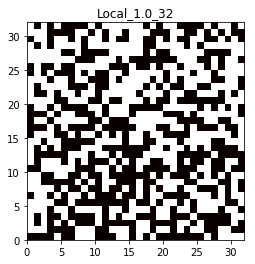

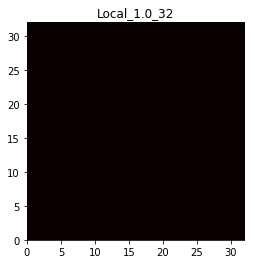

In [5]:
# RED 32X32 T=1.0 K Y nsteps=40000*N

import os
import random
L=32
N=L*L
T=1.0
nsteps=20000*N
E=[]

filename="data_local_"+str(L)+"_"+str(T)+".txt"
if os.path.isfile(filename):
    f=open(filename,"r")
    S=[]
    for line in f:
        S.append(int(line))
    f.close()
    print "Starting from file",filename
else:
    S=[random.choice([-1,1]) for k in range(N)]
    print "Starting from a random configuration"
f=open(filename,"w")
for a in S:
    f.write(str(a)+'\n')
f.close()

def x_y(k,L):
    y=k//L
    x=k-y*L
    return x,y

conf=[[0 for x in range(L)] for y in range(L)]
for k in range(N):
    x,y=x_y(k,L)
    conf[x][y]=S[k]

pylab.imshow(conf, extent=[0,L,0,L],interpolation='nearest')
pylab.set_cmap('hot')
pylab.title(r'Local_'+str(T)+'_'+str(L))
pylab.savefig('plotA2_local_'+str(T)+'_'+str(L)+'.png')
pylab.show()


def energy(S,N,nbr): # ESTA RUTINA CALCULA LAS ENERGIAS DE UN MICROESTADO EN PARTICULAR
    E=0.0
    for k in range(N):
        E-=S[k]*sum(S[nn] for nn in nbr[k])
    return 0.5*E
beta=1/T
nbr={i:((i//L)*L+(i+1)%L,(i+L)%N,(i//L)*L+(i-1)%L,(i-L)%N) for i in range(N)}
Energy=energy(S,N,nbr)


for step in xrange(nsteps):
        k=random.randint(0,N-1)
        delta_E=2.0*S[k]*sum(S[nn] for nn in nbr[k])
        if random.uniform(0.0,1.0)<np.exp(-beta*delta_E): # SE ACEPTA UNA CONFIGURACION CON PROBABILIDAD METROPOLIS
            S[k]*=-1 # CAMBIA EL ESPIN
            Energy+=delta_E
        E.append(Energy)

for k in range(N):
    x,y=x_y(k,L)
    conf[x][y]=S[k]
    
pylab.imshow(conf, extent=[0,L,0,L],interpolation='nearest')
pylab.set_cmap('hot')
pylab.title(r'Local_'+str(T)+'_'+str(L))
pylab.savefig('plotA2_local_'+str(T)+'_'+str(L)+'.png')
pylab.show()

Starting from file data_local_128_1.0.txt


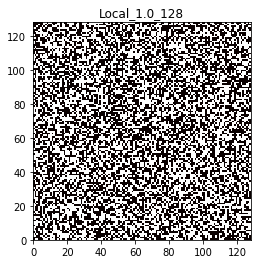

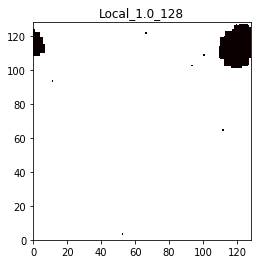

In [7]:
# RED 128X128 T=1.0 K Y nsteps=1000*N

import os
import random
L=128
N=L*L
T=1.0
nsteps=1000*N
E=[]

filename="data_local_"+str(L)+"_"+str(T)+".txt"
if os.path.isfile(filename):
    f=open(filename,"r")
    S=[]
    for line in f:
        S.append(int(line))
    f.close()
    print "Starting from file",filename
else:
    S=[random.choice([-1,1]) for k in range(N)]
    print "Starting from a random configuration"
f=open(filename,"w")
for a in S:
    f.write(str(a)+'\n')
f.close()

def x_y(k,L):
    y=k//L
    x=k-y*L
    return x,y

conf=[[0 for x in range(L)] for y in range(L)]
for k in range(N):
    x,y=x_y(k,L)
    conf[x][y]=S[k]

pylab.imshow(conf, extent=[0,L,0,L],interpolation='nearest')
pylab.set_cmap('hot')
pylab.title(r'Local_'+str(T)+'_'+str(L))
pylab.savefig('plotA2_local_'+str(T)+'_'+str(L)+'.png')
pylab.show()


def energy(S,N,nbr): # ESTA RUTINA CALCULA LAS ENERGIAS DE UN MICROESTADO EN PARTICULAR
    E=0.0
    for k in range(N):
        E-=S[k]*sum(S[nn] for nn in nbr[k])
    return 0.5*E
beta=1/T
nbr={i:((i//L)*L+(i+1)%L,(i+L)%N,(i//L)*L+(i-1)%L,(i-L)%N) for i in range(N)}
Energy=energy(S,N,nbr)


for step in xrange(nsteps):
        k=random.randint(0,N-1)
        delta_E=2.0*S[k]*sum(S[nn] for nn in nbr[k])
        if random.uniform(0.0,1.0)<np.exp(-beta*delta_E): # SE ACEPTA UNA CONFIGURACION CON PROBABILIDAD METROPOLIS
            S[k]*=-1 # CAMBIA EL ESPIN
            Energy+=delta_E
        E.append(Energy)

for k in range(N):
    x,y=x_y(k,L)
    conf[x][y]=S[k]
    
pylab.imshow(conf, extent=[0,L,0,L],interpolation='nearest')
pylab.set_cmap('hot')
pylab.title(r'Local_'+str(T)+'_'+str(L))
pylab.savefig('plotA2_local_'+str(T)+'_'+str(L)+'.png')
pylab.show()

### Análisis de dominios magnéticos

De las gráficas anteriores podemos hacer las siguientes observaciones:
1) En el caso de alta temperatura el sistema evoluciona como se espera hacia un estado de desorden en los espines. Es decir, el número de espines hacia arriba es aproximadamente el mismo de espines hacia abajo y sus posiciones estan aleatoriamente distribuidas. Esta situación corresponde a la fase paramagnética.
2) Cuando estamos en el regimen de temperatuas cercanas a la temperatura de Curie, se empiezan a observar pequeñas regiones donde los espones están alineados, es decir este es el punto donde el sistema va a sufrir su transición de fase.
3) Finalmente, si el sistema está por debajo de la temperatura de Curie este evoluciona hacia un estado donde se pueden observar regiones conexas de espines alineados en la misma dirección. Estas regiones se conocen como dominios magnéticos y representan el estado ferromagnético.

In [15]:
def energia(Temp,L,itera):
    nsteps=itera*L*L
    N=L*L
    S=[random.choice([-1,1]) for k in range(N)]
    E=[]
    beta=float(1/Temp)
    nbr={i:((i//L)*L+(i+1)%L,(i+L)%N,(i//L)*L+(i-1)%L,(i-L)%N) for i in range(N)} # DICCIONARIO CON LAS CONDICIONES DE FRONTERA

    Energy=energy(S,N,nbr) # SE CALCULA LA ENERGIA DE LA CONFIGURACION INICIAL

    for step in xrange(nsteps): # ESTA RUTINA GENERA LA DINAMICA DEL SISTEMA
            k=random.randint(0,N-1)
            delta_E=2.0*S[k]*sum(S[nn] for nn in nbr[k])
            if random.uniform(0.0,1.0)<np.exp(-beta*delta_E): # SE ACEPTA UNA CONFIGURACION CON PROBABILIDAD METROPOLIS
                S[k]*=-1 # CAMBIA EL ESPIN
                Energy+=delta_E
            if float(step)/nsteps>0.40:      
                E.append(Energy) # AGREGA EL NUEVO VALOR DE LA ENERGIA
    Energia=np.array(E)
    Energia2=Energia**2
    return [sum(Energia)/float(len(Energia)),sum(Energia2)/float(len(Energia2))]


def EyE2vsT(L,nsteps):
    rango_T=np.linspace(0.3,5,30)
    Et=[]
    E2t=[]
    for Temp in rango_T:
        a=energia(Temp,L,nsteps)
        Et.append(a[0])
        E2t.append(a[1])
    return [np.array(Et),np.array(E2t)]


In [22]:
T=np.linspace(0.3,5,30)

# 2X2
L=2
a=EyE2vsT(L,35000)
E=a[0]
E2=a[1]

print "ya"

CV2=(E2-E*E)/(T**2)/4
# 3X3
L=3
a=EyE2vsT(L,35000)
E=a[0]
E2=a[1]

print "ya"

CV3=(E2-E*E)/(T**2)/9

# 4X4
L=4
a=EyE2vsT(L,35000)
E=a[0]
E2=a[1]

print "ya"

CV4=(E2-E*E)/(T**2)/16

# 5X5
L=5
a=EyE2vsT(L,25000)
E=a[0]
E2=a[1]

print "ya"

CV5=(E2-E*E)/(T**2)/25

# 6X6
L=6
a=EyE2vsT(L,20000)
E=a[0]
E2=a[1]

print "ya"

CV6=(E2-E*E)/(T**2)/36






ya
ya
ya
ya
ya


In [35]:
# 8X8
L=8
a=EyE2vsT(L,20000)
E=a[0]
E2=a[1]

print "ya"

CV8=(E2-E*E)/(T**2)/64

# 16X16
L=16
a=EyE2vsT(L,5000)
E=a[0]
E2=a[1]

print "ya"

CV16=(E2-E*E)/(T**2)/256


ya
ya


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.

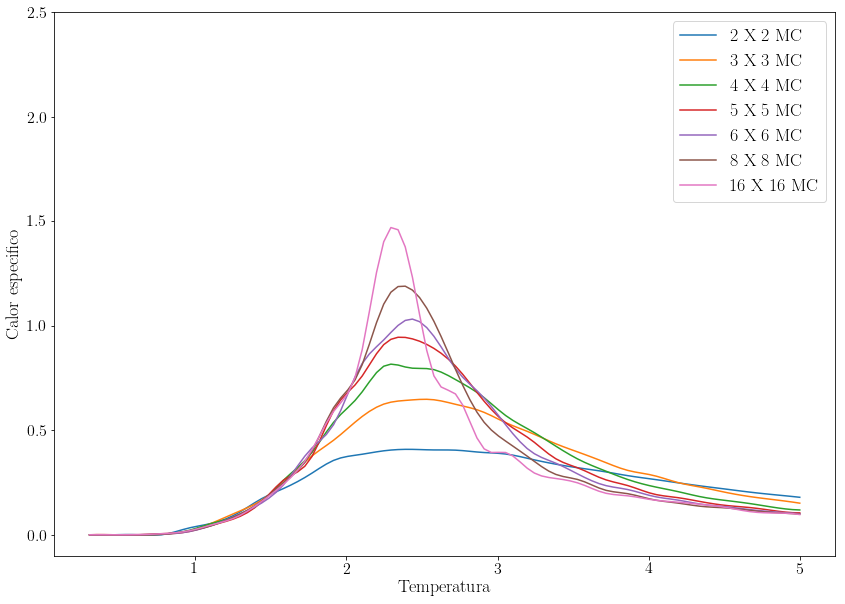

In [109]:
T=np.linspace(0.3,5,30)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)




from scipy.interpolate import spline

Tnew = np.linspace(T.min(),T.max(),100) #300 represents number of points to make between T.min and T.maxT
CV2S = spline(T,CV2,Tnew)
CV3S = spline(T,CV3,Tnew)
CV4S = spline(T,CV4,Tnew)
CV5S = spline(T,CV5,Tnew)
CV6S = spline(T,CV6,Tnew)
CV8S = spline(T,CV8,Tnew)
CV16S = spline(T,CV16,Tnew)

plt.xlabel("Temperatura",fontsize=18)
plt.ylabel("Calor especifico",fontsize=18)

plt.plot(Tnew,CV2S,label="2 X 2 MC")
plt.plot(Tnew,CV3S,label="3 X 3 MC")
plt.plot(Tnew,CV4S,label="4 X 4 MC")
plt.plot(Tnew,CV5S,label="5 X 5 MC")
plt.plot(Tnew,CV6S,label="6 X 6 MC")
plt.plot(Tnew,CV8S,label="8 X 8 MC")
plt.plot(Tnew,CV16S,label="16 X 16 MC")


ylim(-0.1,2.5)
plt.legend(fontsize=18)

### Comparacion método de Metropolis vs Enumeración Exacta

Finalmente vamos a comparar para el tamaño de sistema 5X5 las predicciones del método de Metropolis-Hastings versus el método de numeración exacta. Como se puede ver en la gráfica las dos predicciones se parecen razonablemente.

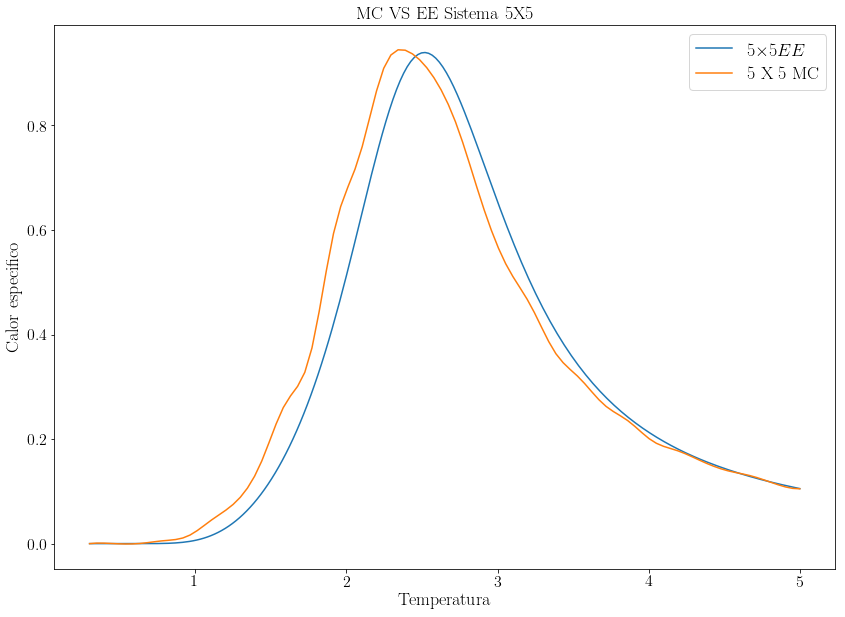

In [118]:
T=np.linspace(0.3,5,200)
plt.title("MC VS EE Sistema 5X5",fontsize=18)
plt.xlabel("Temperatura",fontsize=18)
plt.ylabel("Calor especifico",fontsize=18)
plt.plot(T,cv5,label=r'5\times5 EE')
plt.plot(Tnew,CV5S,label="5 X 5 MC")
plt.legend(fontsize=18)

## Conclusiones

Durante el desarrollo de este trabajo hemos resuelto el modelo de Ising 2D utilizando dos métodos diferentes: numeración exacta y método de Metropolis. Vamos a exponer las particualaridades observadas en cada a método.

#### Enumeración exacta

Este método se basa en el conteo de la energía de cada uno de los microestados, contando uno por uno. Este método permite el cálculo exacto de la función particion $Z(\beta)$ y por tanto a partir de esta de las cantidades termodinámicas macroscópicas. Sin embargo, hemos visto también que es un método que solo se puede utilizar para sistemas pequeños ya que para sistemas mayores a 5X5 los tiempos de cómputo y la memoria necesaria son exorbitantes.

#### Monte Carlo Metropolis

Este método se basa en el cálculo de las cantidades termodinámicas mediante promedios aritméticos utilizando el método de metropolis para aceptar o rechazar nuevas configuraciones aleatoriamente generadas. Con esto se busca que el sistema evolucione hacia el estado de equilibrio dado un número de pasos grande. Utilizando este método podemos resolver el caso de sistemas mucho más grandes como el sistema 128X128 que sería imposible resolver utilizando el método de enumeración exacta. Este método tiene el problema de que se necesitan un número de iteraciones bastante significativo para que el sistema termalice y se puedan obtener promedios representativos. 

Para terminar, queremos mencionar que por cualquier método que escojamos para resolver el modelo de Ising 2D podemos observar que hay un cambio de fase luego de una temperatura crítica llamada temperatura de Curie. Onsayer calculó en 1952 analíticamente esta temperatura, $T_C=2.269185$, en nuestro trabajo utilizando el método de enumeración exacta hemos obtenido un error del 3.5% en el cálculo de la temperatura de Curie.

Finalmente el modelo de Ising 2D explica porqué existen materiales como el hierro que por debajo de una temperatura dada tienen una imanación intrínseca diferente de 0 y porque también una vez superada esta temperatura el material cambia del regimen ferromagnético a uno paramagnético donde la imanación del sistema se vuelve 0.